

```
# Ce texte est au format code
```

# Artical analysis : Medical image enhancement based on histogram algorithms

## Done by : Arij Habbechi and Yasmine Gharbi RT4/1

#Introduction

Medical image enhancement is a critical step in improving the visual clarity and contrast of images obtained from various modalities like MRI, CT scans, and X-rays. Effective enhancement techniques are essential for aiding radiologists and medical professionals in diagnosing conditions accurately and efficiently. Among the various approaches, histogram-based algorithms have been widely recognized for their ability to improve the brightness and contrast of medical images, thereby enhancing diagnostic capabilities.

#Objective

The objective of this report is to meticulously analyze and implement the histogram-based medical image enhancement techniques described in the scientific article provided. By replicating the steps outlined, the goal is to evaluate and compare the effectiveness of each method using the same metrics presented in the article. This includes a detailed examination of the algorithms' impact on image quality through quantitative assessments. The report aims to document the procedures, observations, and comparative analysis of the results to identify the most effective enhancement technique for medical images.

#Algorithm Overview

###**Algorithm: Histogram Equalization (HE)**
**Input**: Original grayscale image with pixel intensity levels in the range [I_min, I_max].


**Output**: Image with enhanced contrast.

1. **Calculate the histogram** of the original image to determine the frequency of each intensity level.
2. **Compute the probability distribution** of each intensity level by dividing the frequency of each intensity by the total number of pixels in the image.
3. **Calculate the Cumulative Distribution Function (CDF)** for each intensity level, which is the cumulative sum of the probabilities up to that intensity level.
4. **Normalize the CDF** to span the entire intensity range [New_min, New_max], typically [0, L-1] where L is the number of possible intensity levels ( 256 for an 8-bit image).
5. **Map the old intensities to new intensities** using the normalized CDF as a lookup table, where each old intensity value is mapped to a new value that corresponds to the normalized CDF value of that intensity.
6. **Construct the enhanced image** by replacing each pixel in the original image with its new intensity value according to the lookup table.
7. **Return the contrast-enhanced image**.


### **Algorithm: Cumulative Histogram Equalization (CHE)**
**Input**: Original grayscale image  
**Output**: Image with enhanced contrast after applying CHE

1. **Compute the histogram** of the original image to determine the frequency of each intensity level.
2. **Calculate the Cumulative Distribution Function (CDF)** for each pixel intensity, which is the cumulative sum of the histogram counts up to that intensity level.
3. **Find the minimum non-zero value in the CDF** (CDF_min), essential for normalizing the histogram.
4. **Normalize the CDF** by subtracting CDF_min and scaling the result to the range [0, L-1], where L is the number of possible intensity levels (e.g., 256 for an 8-bit image).
5. **Calculate the new pixel values** by applying the normalized CDF to the original pixel values, effectively mapping the old intensities to the new intensities.
6. **Replace each pixel** in the original image with its new value, rounding to the nearest integer if necessary.
7. **Return the image** with enhanced contrast, where the contrast is adjusted based on the normalized CDF.

This algorithm emphasizes the use of the cumulative nature of the histogram to redistribute the intensity values across the available range, enhancing the contrast of the image.


###**Algorithm: Quadratic Dynamic Histogram Equalization (QDHE)**
**Input**: Original grayscale image with intensity levels [0, L-1]  
**Output**: Image with enhanced contrast using QDHE

1. **Histogram Partitioning**:
   - Compute the histogram of the original image.
   - Divide the histogram into two sub-histograms using the median value.
   - Further divide each sub-histogram into two using their medians, resulting in four sub-histograms.
   - Set the minimum and maximum intensity values of the input histogram as the limiting separating points.

2. **Clipping**:
   - Define a clipping limit/threshold Tc.
   - For each sub-histogram, clip the values exceeding Tc to redistribute excess to other bins.

3. **Gray Level Range Allocation**:
    - For each sub-histogram i:
       - Calculate the span for the sub-histogram: span_i = m_i+1 - m_i, with m_i being the median intensity.
       - Calculate the range for the sub-histogram: range_i = (L-1) * (span_i / sum(span_k from k=1 to 4)).

4. **Histogram Equalization**:
    - For each sub-histogram i:
       - Calculate the new dynamic range [i_start, i_end]:
              - i_start = (i-1) * i_end + 1 (for i > 1), with i_start = 0 (for i = 1).
              - i_end = i_start + range_i.
       - Apply HE to the sub-histogram within [i_start, i_end]:
               - For each pixel intensity x in the sub-histogram:
                   - y(x) = (i_start - i_end) * cdf(x) + i_start, where cdf(x) is the cumulative distribution function of the sub-histogram.

5. **Merge Processed Sub-Histograms**:
   - Combine the equalized sub-histograms to construct the new histogram for the entire image.

6. **Map New Histogram to Image**:
   - Assign the new intensity values from the processed histogram to the corresponding pixels in the image.



### **Algorithm: Contrast Limited Adaptive Histogram Equalization (CLAHE)**
**Input**: Original grayscale image with intensity levels [0, L-1]  
**Output**: Image with locally enhanced contrast using CLAHE

1. **Image Partitioning**:
   - Divide the image into several almost equal sizes and non-overlapping regions, categorized into corner regions (CR), border regions (BR), and inner regions (IR).

2. **Histogram Calculation**:
   - Calculate the histogram for each region separately.

3. **Clipping Process**:
   - Define a clipping limit/threshold \(T_c\).
   - Clip the histograms at \(T_c\), redistributing excess values evenly across other bins to control contrast enhancement and avoid over-amplification of noise.

4. **Histogram Equalization**:
   - For each region, apply Histogram Equalization using the clipped histogram to calculate new pixel values.

5. **Bilinear Interpolation**:
   - For each pixel, find its closest four neighboring grid points.
   - Use the intensity value of that pixel as an index to find its mapping at the four grid points.
   - Interpolate among these values to obtain the mapping at the current pixel location, ensuring smooth transitions between adjacent regions.

6. **Recombination and Output**:
   - Combine the processed regions to construct the enhanced image.
   - Ensure continuity at region boundaries through careful interpolation and mapping of pixel intensities.

This approach allows for localized contrast enhancement, particularly useful in images with varying lighting conditions, by adapting the histogram equalization process to smaller regions and limiting the contrast stretch to avoid noise amplification.


#Implementation

In [ ]:
import cv2 as cv2
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

###1. Histogram equalization-HE

In [ ]:
def histogram_equalization(image):
    equalized_image = cv2.equalizeHist(image)
    hist,bins = np.histogram(equalized_image.flatten(),256,[0,256])
    cdf = hist.cumsum()
    #cdf= Cumulative Distribution Function of an image
    cdf_normalized = cdf * float(hist.max()) / cdf.max()
    return equalized_image

In [ ]:
def histogram_equalization_manual(image):
    # Step 1: Calculate the histogram
    hist, bins = np.histogram(image.flatten(), 256, [0, 256])

    # Step 2: Compute the probability distribution
    pdf = hist / float(np.sum(hist))

    # Step 3: Calculate the CDF
    cdf = pdf.cumsum()

    # Step 4: Normalize the CDF
    cdf_normalized = (cdf - cdf.min()) * 255 / (cdf.max() - cdf.min())
    cdf_normalized = cdf_normalized.astype('uint8')

    # Step 5: Create a lookup table
    # Step 6: Replace each pixel value
    equalized_image = cdf_normalized[image]

    return equalized_image

###2. Cumulative histogram equalization-CHE

In [ ]:
def cumulative_histogram_equalization(image):
    # Ensure the image is in grayscale
    if len(image.shape) > 2:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Step 1: Compute the histogram
    hist, bins = np.histogram(image.flatten(), 256, [0, 256])

    # Step 2: Calculate the CDF
    cdf = hist.cumsum()

    # Step 3: Find the minimum non-zero value in the CDF
    cdf_min = cdf[np.nonzero(cdf)].min()

    # Step 4: Normalize the CDF
    cdf_normalized = (cdf - cdf_min) * 255 / (cdf - cdf_min).max()
    cdf_normalized = cdf_normalized.astype('uint8')

    # Step 5 & 6: Calculate new pixel values and replace them
    equalized_image = cdf_normalized[image]

    return equalized_image


###3. Quadratic dynamic histogram equalization-QDHE



In [ ]:
def qdhe(image, clip_limit, L=256):

    def histogram_partitioning(image):
              # Compute the histogram and the cumulative histogram
      hist, bin_edges = np.histogram(image.flatten(), bins=256, range=(0, 256))
      cumulative_hist = np.cumsum(hist)

      # Total number of pixels
      total_pixels = cumulative_hist[-1]

      # Find the median value, where the cumulative histogram reaches half the total pixel count
      median_value = np.searchsorted(cumulative_hist, total_pixels // 2)

      # Split the histogram at the median to create two sub-histograms
      sub_hist1 = hist[:median_value]
      sub_hist2 = hist[median_value:]

      # Find the medians of these sub-histograms and split them further
      median_sub_hist1 = np.searchsorted(np.cumsum(sub_hist1), np.sum(sub_hist1) // 2)
      median_sub_hist2 = np.searchsorted(np.cumsum(sub_hist2), np.sum(sub_hist2) // 2) + median_value

      # Create four sub-histograms using the median values
      sub_histograms = [
          hist[:median_sub_hist1],
          hist[median_sub_hist1:median_value],
          hist[median_value:median_sub_hist2],
          hist[median_sub_hist2:]
      ]

      # Indices where the splits occur
      partition_indices = [0,median_sub_hist1, median_value, median_sub_hist2,255]

      return sub_histograms, partition_indices


    def clipping(hist, clip_limit):
      clipped_hist = np.clip(hist, 0,clip_limit)
      excess_pixels = np.sum(hist - clipped_hist)
      average_increment = excess_pixels // hist.size
      increment_array = np.minimum(clip_limit - clipped_hist, average_increment)

      # Distribute the excess pixels
      while excess_pixels > 0:
          underflow_mask = increment_array < average_increment
          increment_array[underflow_mask] += 1
          excess_pixels -= np.sum(increment_array)
          increment_array = np.minimum(clip_limit - (clipped_hist + increment_array), average_increment)

      clipped_hist += increment_array
      return clipped_hist


    def new_gray_level_range_allocation(partition_indices, total_pixels, L=256):
        # Calculate spans for each sub-histogram
      spans = [partition_indices[i+1] - partition_indices[i] for i in range(len(partition_indices)-1)]
      sum_spans = sum(spans)
      L = 256

      # Calculate range_i for each sub-histogram
      range_allocation_factor = (L-1) / sum_spans
      ranges = [span * range_allocation_factor for span in spans]

      # Initialize the first i_start
      i_start = 0  # The first i_start is at the minimum intensity value of the new dynamic range

      # Calculate i_start and i_end for each sub-histogram
      new_ranges = []
      for i, range_i in enumerate(ranges):
          # For i_start, add 1 to the previous i_end, which is i_start - 1
          if i != 0:
              i_start = new_ranges[i-1][1] + 1
          i_end = int(i_start + range_i)
          if i_end > L - 1:
              i_end = L - 1
          new_ranges.append((i_start, i_end))
          # If we've reached the maximum intensity value, break out of the loop
          if i_end == L - 1:
              break

      return (new_ranges)

    # Your provided equalize_sub_histogram function here
    def equalize_sub_histogram(sub_hist, i_start, i_end, L=256):
         # Compute the cumulative distribution function (CDF) for the sub-histogram
      cdf = np.cumsum(sub_hist)
      # Normalize the CDF
      cdf_normalized = cdf / cdf[-1]
      # Map the CDF to the new intensity range [i_start, i_end]
      equalized_values = np.interp(np.linspace(0, 1, len(sub_hist)), np.linspace(0, 1, L), np.linspace(i_start, i_end, L))
      return equalized_values


    def apply_histogram_equalization(image, new_ranges, total_pixels):
      height, width = image.shape
      image_flattened = image.flatten()
      equalized_image = np.zeros_like(image_flattened)

      for (i_start, i_end), sub_hist in zip(new_ranges, sub_histograms):
          # Calculate the histogram and CDF for the sub-histogram
          sub_hist, _ = np.histogram(image_flattened, bins=np.arange(i_start, i_end+1), range=(i_start, i_end))
          cdf = np.cumsum(sub_hist)
          cdf_normalized = cdf / cdf[-1]

          # Map the CDF to the new intensity range
          xp = np.linspace(i_start, i_end, len(cdf_normalized))
          fp = np.interp(xp, xp, cdf_normalized) * (i_end - i_start) + i_start

          # Apply the mapping to the pixels in the sub-histogram range
          mask = (image_flattened >= i_start) & (image_flattened <= i_end)
          equalized_image[mask] = np.interp(image_flattened[mask], xp, fp).astype(np.uint8)

      # Reshape the equalized image back to the original image shape
      equalized_image = equalized_image.reshape(height, width)
      return equalized_image


    # Perform histogram partitioning
    sub_histograms, partition_indices = histogram_partitioning(image)

    # Total pixels in the image
    total_pixels = image.shape[0] * image.shape[1]

    # Perform clipping on the sub_histograms
    clipped_sub_histograms = [clipping(sub_hist, clip_limit) for sub_hist in sub_histograms]

    # Calculate new ranges based on the partition indices
    new_ranges = new_gray_level_range_allocation(partition_indices, total_pixels, L)

    # Prepare a list to hold the allocated histograms
    allocated_histograms = [np.zeros((new_range[1] - new_range[0] + 1, )) for new_range in new_ranges]

    # Calculate allocated histograms based on new_ranges
    for i, sub_hist in enumerate(clipped_sub_histograms):
        range_start, range_end = new_ranges[i]
        hist_cdf = np.cumsum(sub_hist)
        hist_cdf_normalized = (hist_cdf - hist_cdf[0]) / (hist_cdf[-1] - hist_cdf[0])
        # Scale the cdf to the new range
        allocated_histogram = np.interp(hist_cdf_normalized, (0, 1), (range_start, range_end))
        # Map the old histogram values to the new range
        for j, value in enumerate(allocated_histogram):
            allocated_histograms[i][int(value) - range_start] += sub_hist[j]

    # Perform histogram equalization
    equalized_image = apply_histogram_equalization(image, new_ranges, total_pixels)

    # Plot the original, clipped, and allocated histograms and the equalized image
    fig, axs = plt.subplots(1, 4, figsize=(25, 5))
    fig.suptitle('QDHE Implementation', fontsize=16)
    # Original Histogram
    hist, bin_edges = np.histogram(image.flatten(), bins=256, range=(0, 256))
    axs[0].plot(bin_edges[:-1], hist, label='Original Histogram')
    axs[0].legend()
    axs[0].set_title('Original Histogram')

    # Original Histogram with Split Points
    hist, bin_edges = np.histogram(image.flatten(), bins=256, range=(0, 256))
    axs[0].plot(bin_edges[:-1], hist, label='Original Histogram')
    for idx, val in enumerate(partition_indices):
        axs[0].axvline(x=val, color='r', linestyle='--', label=f'm{idx+1}')
        axs[0].legend()
        axs[0].set_title('Original Histogram with Split Points')

    # Clipped Histogram
    clipped_histogram = np.concatenate(clipped_sub_histograms)
    axs[1].plot(clipped_histogram, label='Clipped Histogram')
    axs[1].legend()
    axs[1].set_title('Clipped Histogram')

    # Allocated Histograms
    for i, allocated_hist in enumerate(allocated_histograms):
        range_start, range_end = new_ranges[i]
        axs[2].bar(np.arange(range_start, range_end+1), allocated_hist, label=f'Allocated Histogram {i+1}')
    axs[2].legend()
    axs[2].set_title('Histogram after New Range Allocation')


    # Equalized Histogram
    equalized_hist, _ = np.histogram(equalized_image.flatten(), bins=256, range=(0, 256))
    axs[3].plot(equalized_hist, label='Equalized Histogram')
    axs[3].legend()
    axs[3].set_title('Equalized Histogram')



    return equalized_image



###4.  Contrast limited adaptive histogram equalization- CLAHE

In [ ]:
def clahe(image, clip_limit=40, grid_size=(8, 8)):

    # Create a CLAHE object with specified clip limit and grid size
    clahe = cv2.createCLAHE(clipLimit=clip_limit, tileGridSize=grid_size)

    # Apply CLAHE to the grayscale image
    clahe_img = clahe.apply(image)

    return clahe_img


###5. Quantative Analysis :

In [ ]:
# Function to calculate Mean Squared Error (MSE)
def calculate_mse(image_enhanced, image_original):
    # Ensure the images are of the same shape
    assert image_enhanced.shape == image_original.shape, "Images must have the same dimensions"
    # Calculate MSE
    mse = np.mean((image_enhanced - image_original) ** 2)
    return mse

# Function to calculate Peak Signal to Noise Ratio (PSNR)
def calculate_psnr(image_enhanced, image_original, L=255):
    mse = calculate_mse(image_enhanced, image_original)
    # Avoid division by zero
    if mse == 0:
        return float('inf')
    psnr = 10 * np.log10((L-1)**2 / mse)
    return psnr

# Function to calculate Standard Deviation (SD) as per the provided formula
def calculate_sd(image):
    n = image.size
    mean_intensity = np.mean(image)
    sum_squared_diff = np.sum((image - mean_intensity) ** 2)
    sd = np.sqrt(sum_squared_diff / (n - 1))
    return sd


###Code implementation on different images :

In [ ]:
images_path = ["/content/Retina.jpg",
               "/content/1889_left.jpg",
               "/content/238_left.jpg",
               "/content/2427_left.jpg",
               "/content/Beningn.jpg",
               "/content/Malign.jpg",
               "/content/Malign.jpg",
               "/content/Normal.jpg"]



def process_and_plot(image_path,clip_limit_qdhe,clip_limit_clahe,grid_size):

    image = cv2.imread(image_path)
    image= cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  # Apply Histogram Equalization methods
      # Histogram Equalization using OpenCV
    he_opencv = histogram_equalization(image)
      # Manual Histogram Equalization
    he_manual = histogram_equalization_manual(image)
      #Cumulative Hisogram Equalization
    he_cumulative = cumulative_histogram_equalization(image)
      #Quadratic dynamic histogram equalization
    qdhe_image=qdhe(image, clip_limit_qdhe, L=256)
      #Contrast limited adaptive histogram equalization method
    clahe_image= clahe(image, clip_limit_clahe, grid_size)

########################
    images = [image, he_manual, he_cumulative, clahe_image]
    titles=['original histogram', 'HE histogram','HE_cumulative Histogram', 'CLAHE Histogram']

    # Set up the plot
    fig, axs = plt.subplots(1, 4, figsize=(25, 5))

    # Loop over the images, process them, and create the plots
    for i, (img, title) in enumerate(zip(images, titles)):

        # Create histogram and CDF
        hist,bins = np.histogram(img.flatten(),256,[0,256])
        cdf = hist.cumsum()
        #cdf= Cumulative Distribution Function of an image
        cdf_normalized = cdf * float(hist.max()) / cdf.max()
        # Plot histogram and CDF
        axs[i].plot(cdf_normalized, color='b')
        axs[i].hist(img.flatten(), 256, [0, 256], color='r')
        axs[i].set_xlim([0, 256])
        axs[i].legend(('cdf', 'histogram'), loc='upper left')
        axs[i].set_title(title)
############################

    # display original and equalized images
    fig, axs = plt.subplots(1, 5, figsize=(20, 5))

    axs[0].imshow(image, cmap='gray', vmin=0, vmax=255)
    axs[0].set_title('Original Image')
    axs[0].axis('off')

    axs[1].imshow(he_opencv, cmap='gray', vmin=0, vmax=255)
    axs[1].set_title('Histogram Equalization ')
    axs[1].axis('off')

    axs[2].imshow(he_cumulative, cmap='gray', vmin=0, vmax=255)
    axs[2].set_title('Cumulative Histogram Equalization')
    axs[2].axis('off')


    axs[3].imshow(qdhe_image, cmap='gray', vmin=0, vmax=255)
    axs[3].set_title('Quadratic dynamic histogram equalization')
    axs[3].axis('off')

    axs[4].imshow(clahe_image, cmap='gray', vmin=0, vmax=255)
    axs[4].set_title('Contrast limited adaptive histogram equalization')
    axs[4].axis('off')

    # Display the figure
    plt.tight_layout()
    plt.show()

  ############################ Metrics computing ####################################
    image_name = image_path.split('/')[-1].split('.')[0],
    metrics = pd.DataFrame({
        'Image': [image_name] * 6,
        'Method': ['Original', 'HE_OpenCV', 'HE_Manual', 'HE_CHE', 'HE_QDHE', 'HE_CLAHE'],
        'MSE': [
            None,  # Original image does not have MSE
            calculate_mse(image, he_opencv),
            calculate_mse(image, he_manual),
            calculate_mse(image, he_cumulative),
            calculate_mse(image, qdhe_image),
            calculate_mse(image, clahe_image)
        ],
        'PSNR': [
            None,  # Original image does not have PSNR
            calculate_psnr(image, he_opencv),
            calculate_psnr(image, he_manual),
            calculate_psnr(image, he_cumulative),
            calculate_psnr(image, qdhe_image),
            calculate_psnr(image, clahe_image)
        ],
        'SD': [
            calculate_sd(image),  # SD for original image
            calculate_sd(he_opencv),
            calculate_sd(he_manual),
            calculate_sd(he_cumulative),
            calculate_sd(qdhe_image),
            calculate_sd(clahe_image)
        ]
    })



    return metrics




1. On **Retina** image :

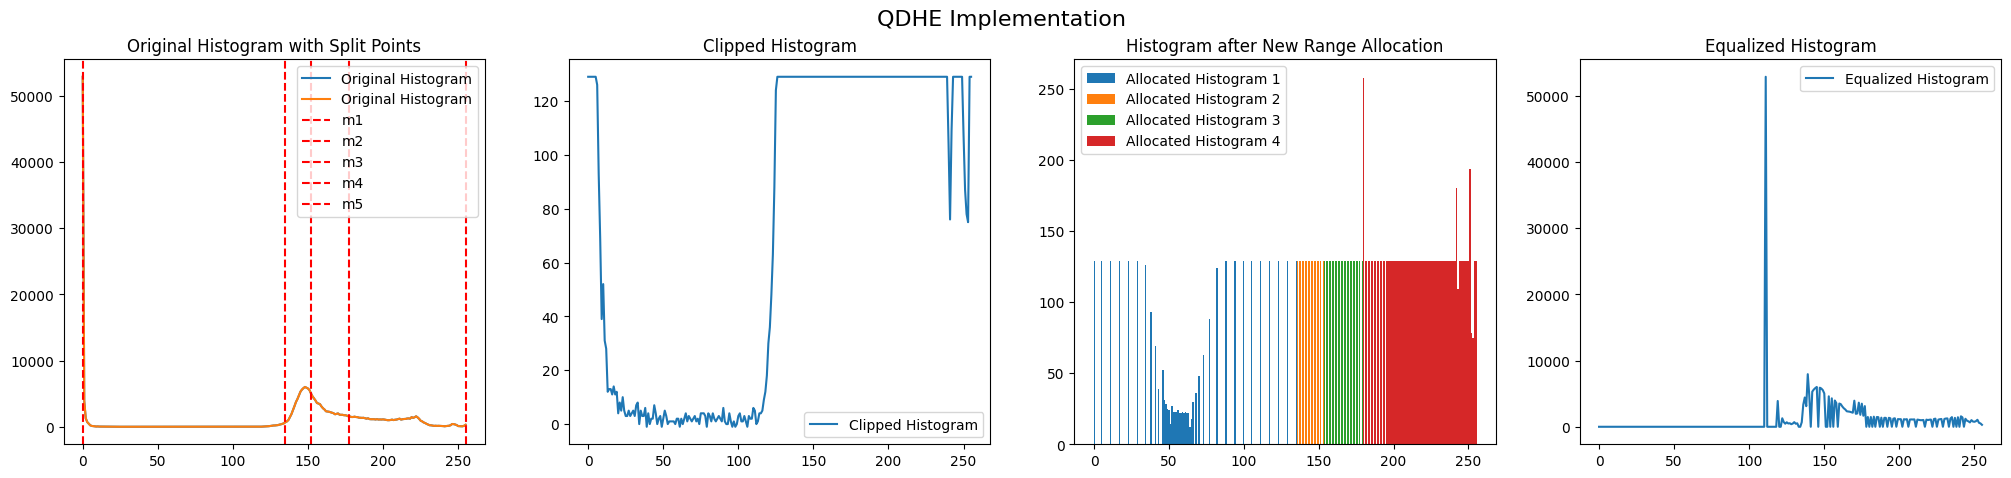

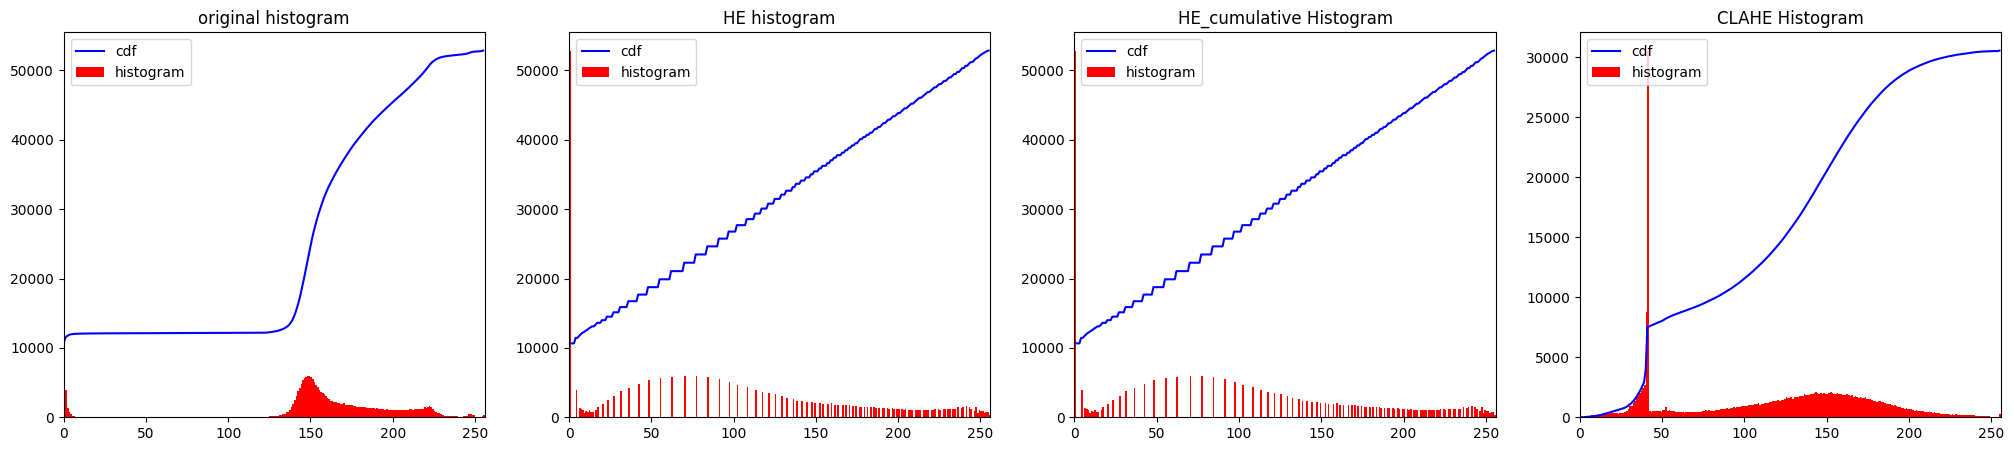

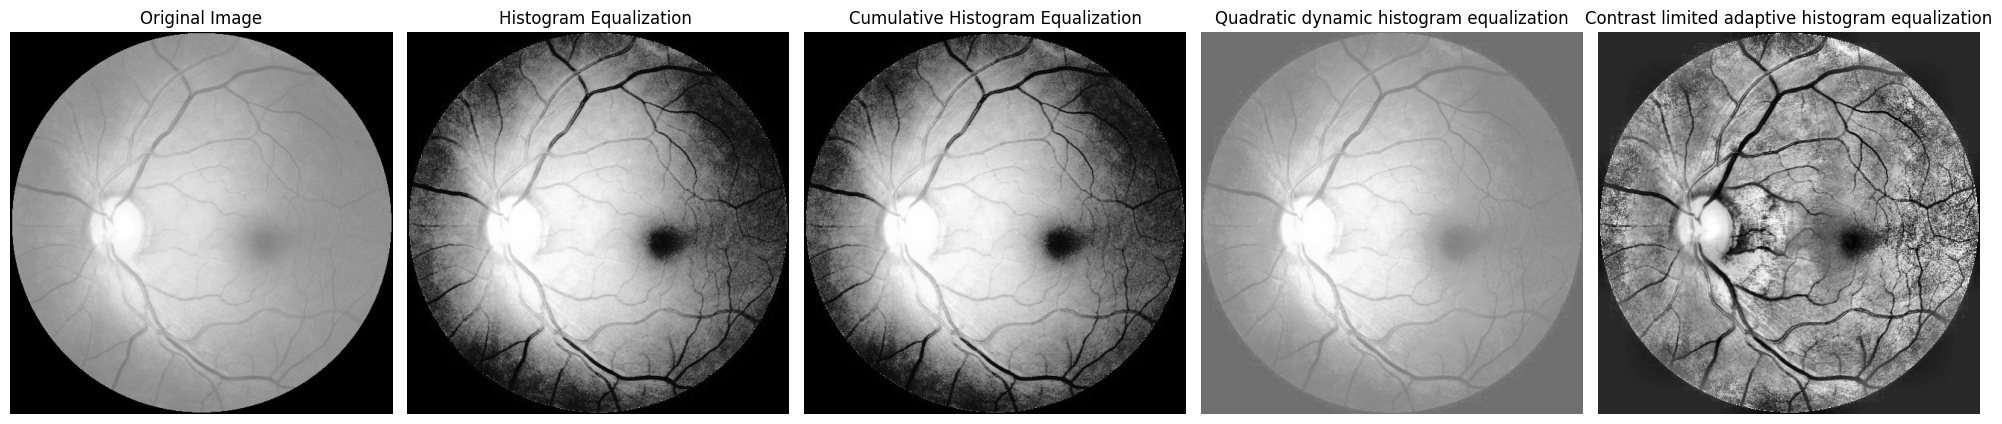

In [ ]:
retina_metrics=process_and_plot(images_path[0],130,40,(8,8))

1.  **Histograms observation :**
- **HE Equalized Histogram**:the histogram is relatively flat across the entire range, suggesting a uniform distribution of intensities. This due to the nature of  HE that aims to use the entire available intensity range equally, which can lead to a loss of detail in areas where the original histogram was already well-balanced. This effect is typical for global histogram equalization methods.
- **Cumulative Histogram (CHE) Equalized Histogram:** Similar to the HE histogram but may show variations in slope steepness. The CHE technique enhances contrast based on the cumulative histogram, which can produce a more nuanced enhancement compared to standard HE. This method tends to preserve the image's original brightness levels more faithfully.
- **QDHE Equalized Histogram:** The histogram shows a more even distribution of intensities but with multiple peaks.The peaks correspond to the four quadrants processed separately. Each peak indicates the intensities are spread out within the subranges, leading to localized enhancements. This results in a contrast that may be improved in different parts of the image.
- **CLAHE Equalized Histogram:** The histogram has a smooth curve with fewer peaks and valleys than QDHE. CLAHE divides the image into small regions and applies HE to each one with a contrast limiting step. This results in a more controlled enhancement that better preserves local details and reduces noise, which is evident in the smoother appearance of the histogram.

2.   **Images Observation :**

- **Original Image:** Appears flat with low contrast. Detail in both bright and dark areas is limited.

- **Histogram Equalization**: Increased overall contrast, but with potential loss of detail in already bright regions, such as the light reflection in the center.

- **Cumulative Histogram Equalization:** Offers a more moderate contrast enhancement. Details are slightly more visible than in the original but less so compared to Histogram Equalization.

- **Quadratic Dynamic Histogram Equalization:** the contrast seems smoother, this may be because it gradually adjusts the brightness incrementally rather than all at once. The step-by-step enhancement maintains the original balance between light and dark areas, leading to a more natural appearance.
The contrast is improved while keeping image details clear and avoiding unwanted changes.=.

- **Contrast Limited Adaptive Histogram Equalization:** Provides the most pronounced contrast enhancement. It avoids the unnatural look of over-enhancement and preserves details across different intensity regions, leading to a more detailed and textured appearance, especially noticeable in the darker regions of the image.



2. On "Normal" image :

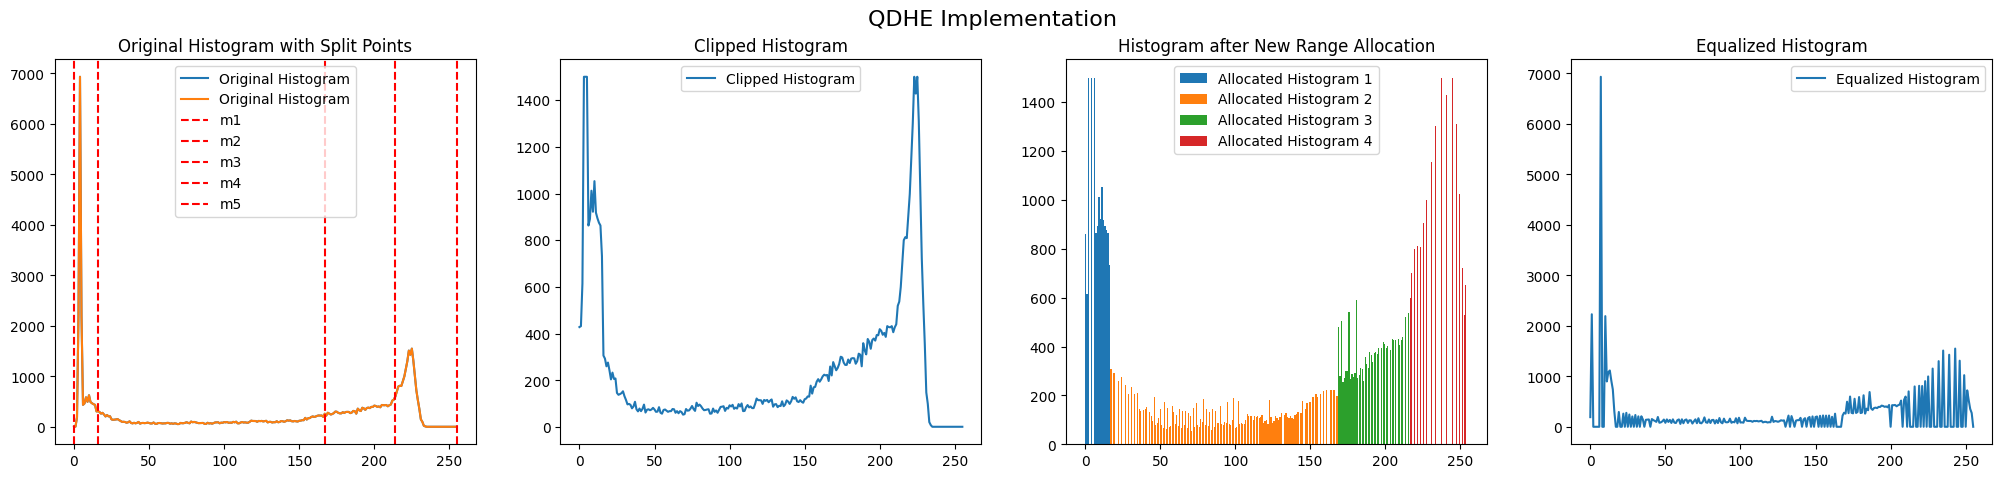

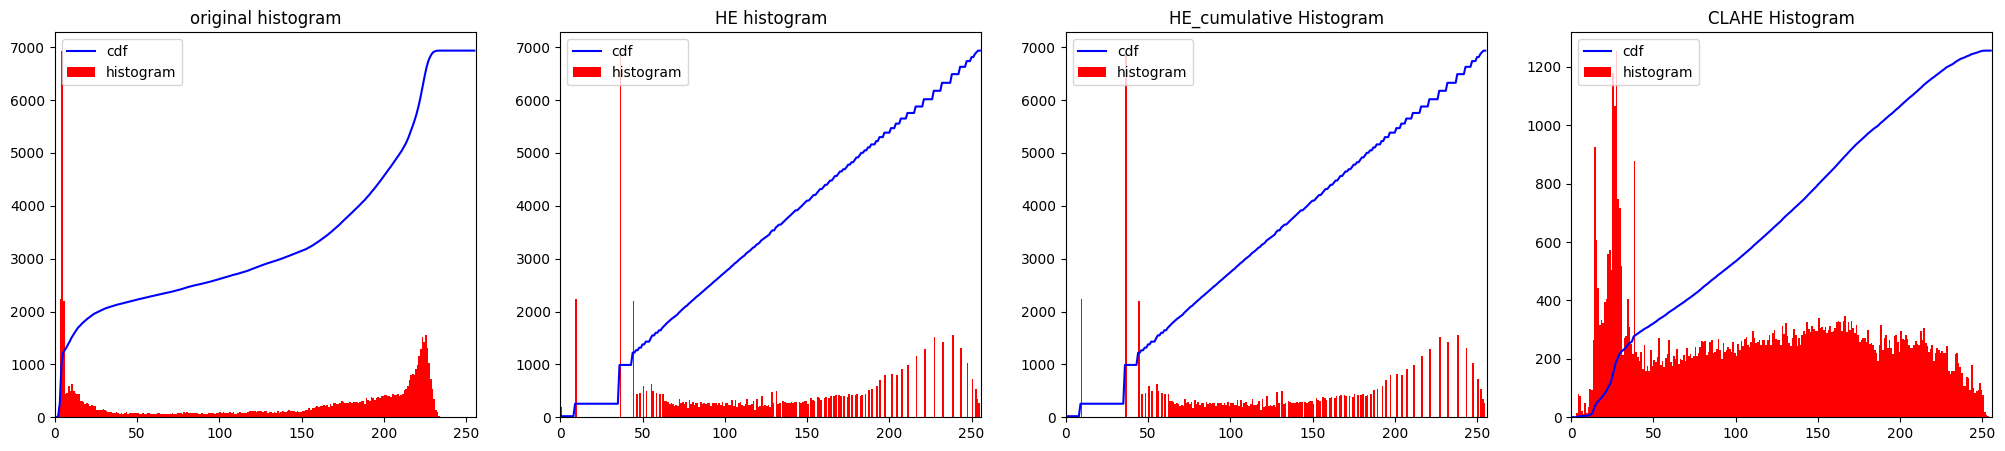

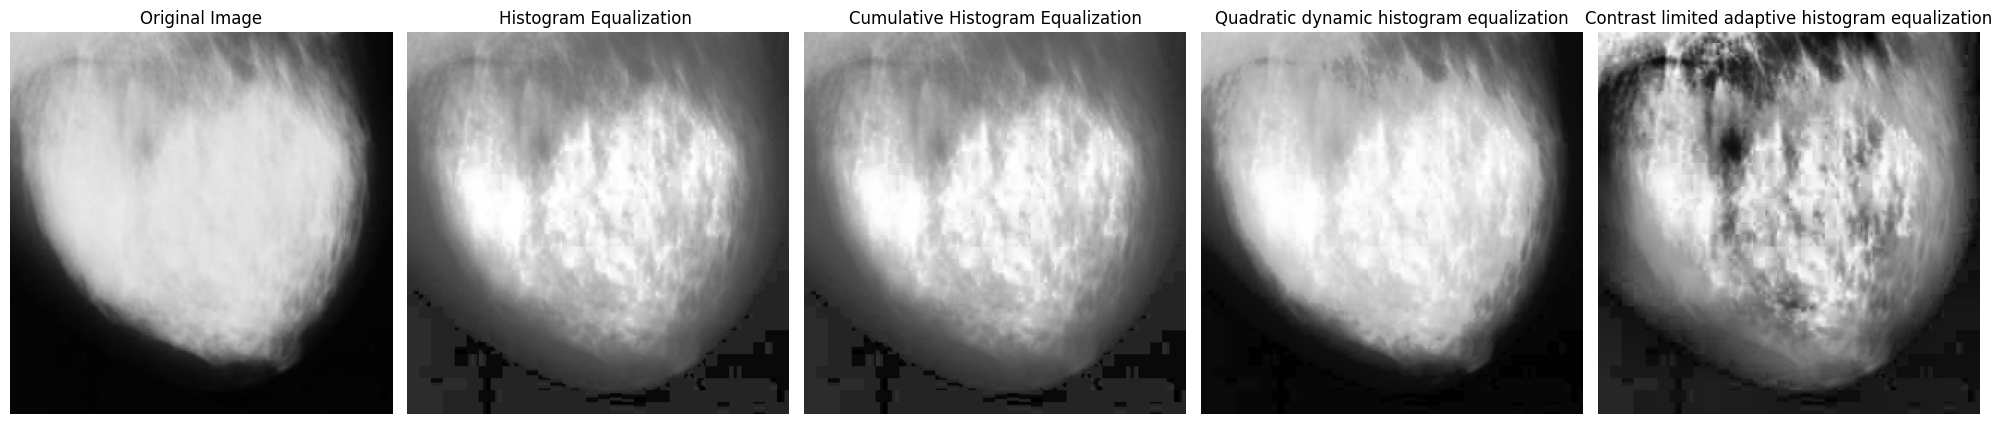

In [ ]:
normal_metrics=process_and_plot(images_path[4],1500,10,(5,5))

1.  **Histograms observation :**
- **HE Equalized Histogram**: This histogram is uniformly spread, indicating a global enhancement that may not differentiate between details, potentially flattening the image.
- **Cumulative Histogram (CHE) Equalized Histogram:** Appears similar to HE,but more controlled.
- **QDHE Equalized Histogram:** Characterized by distinct peaks, reflecting a segmented approach to contrast enhancement that adapts to different intensity levels within the image.
- **CLAHE Equalized Histogram:** Demonstrates a balanced curve without sharp peaks, suggesting a refined, localized contrast enhancement that maintains detail across the board.

2.   **Images Observation :**

- **Original Image:**Likely to have lower contrast with less visible detail, especially in areas of uniform intensity.

- **Histogram Equalization**: Results in a brighter image with higher contrast but may overemphasize bright areas and diminish detail in shadows.

- **Cumulative Histogram Equalization:** Might look similar to HE results due to both methods stretching the intensity range

- **Quadratic Dynamic Histogram Equalization:**Enhances contrast in a balanced way, preserving details and avoiding over-enhancement in both light and dark areas.

- **Contrast Limited Adaptive Histogram Equalization:**
Achieves a detailed and textured image with contrast improvements that are specific to local regions


*3*. On **Beningn** image :

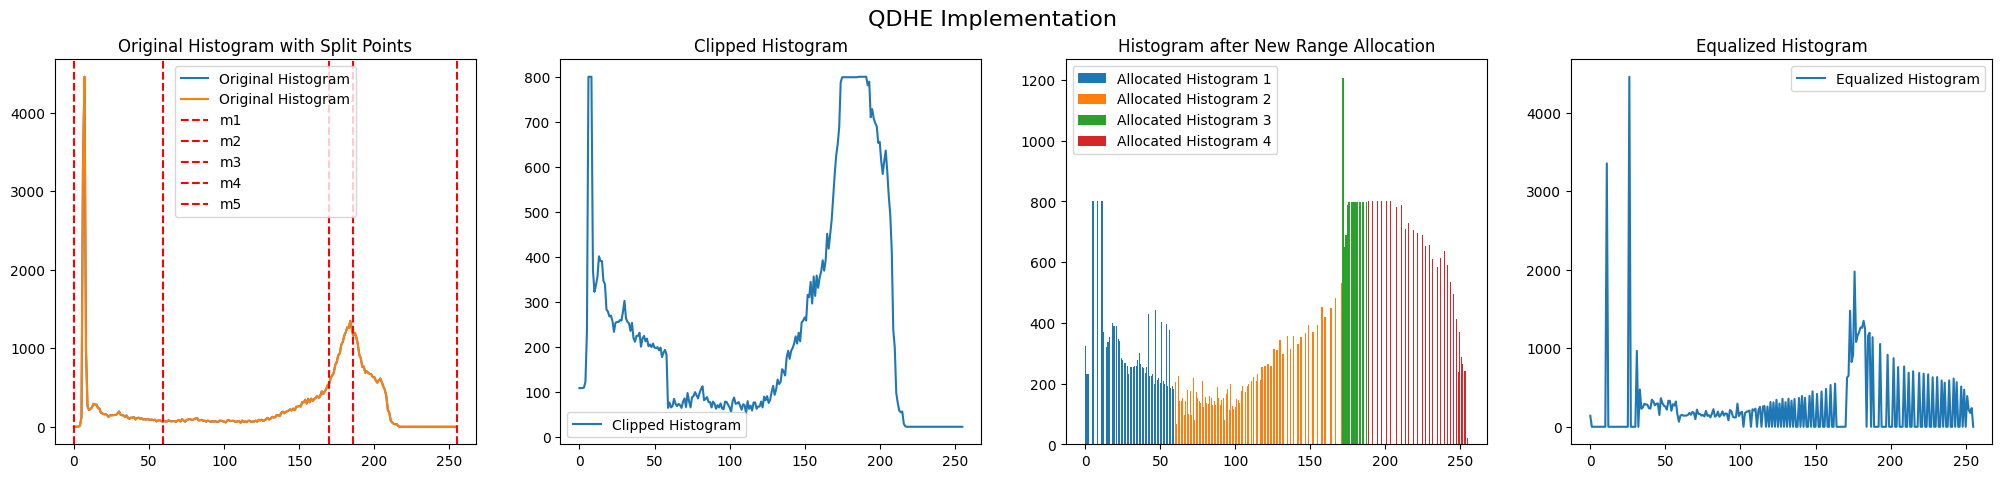

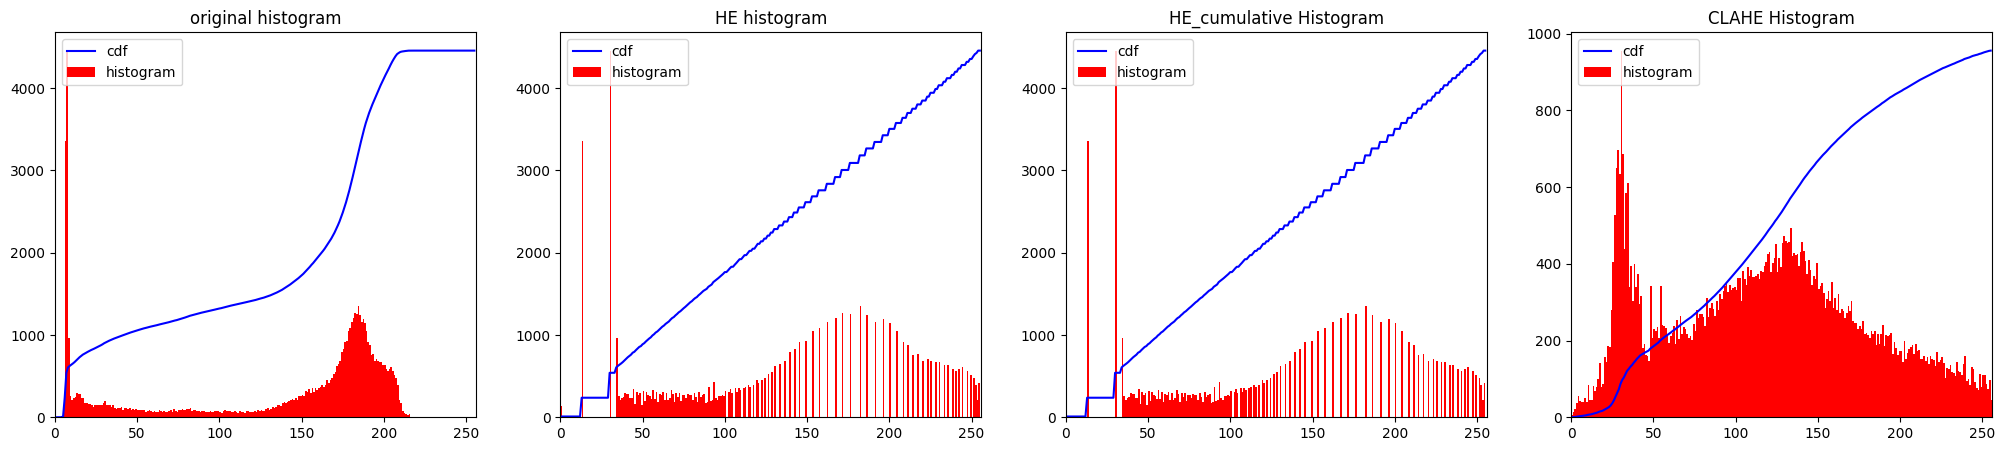

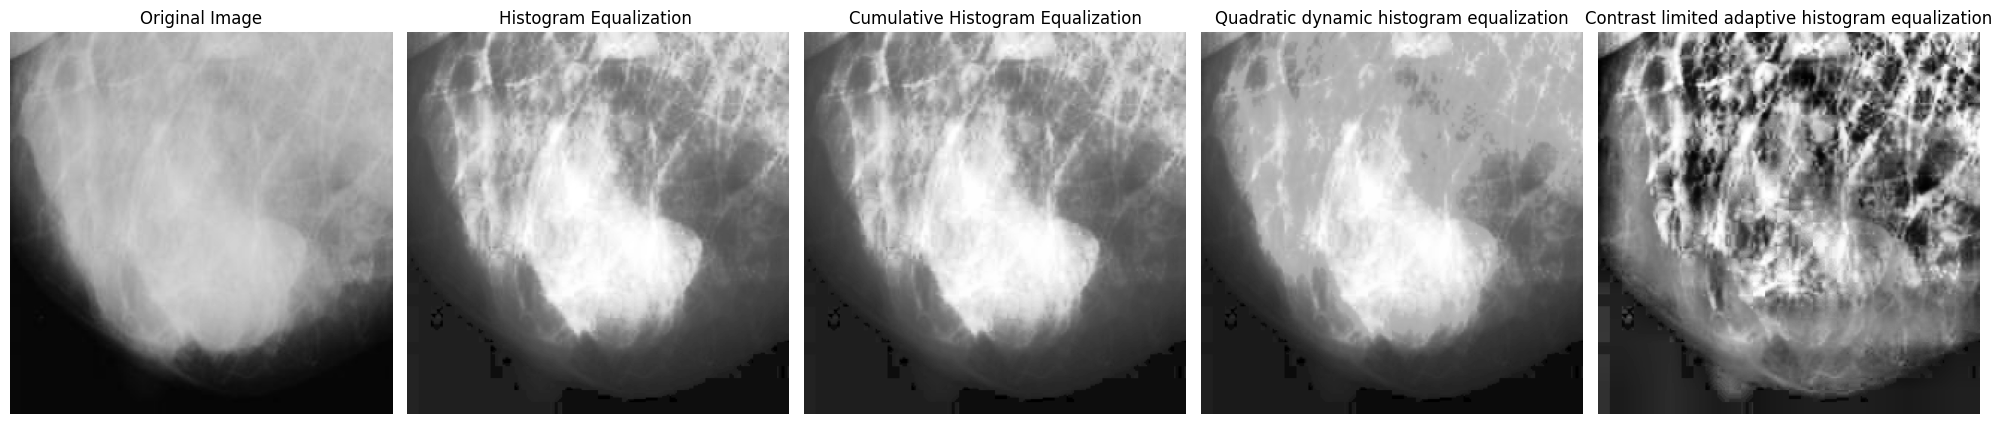

In [ ]:
beningn_metrics=process_and_plot(images_path[5],800,20,(8,8))

4. On **Malign** image :

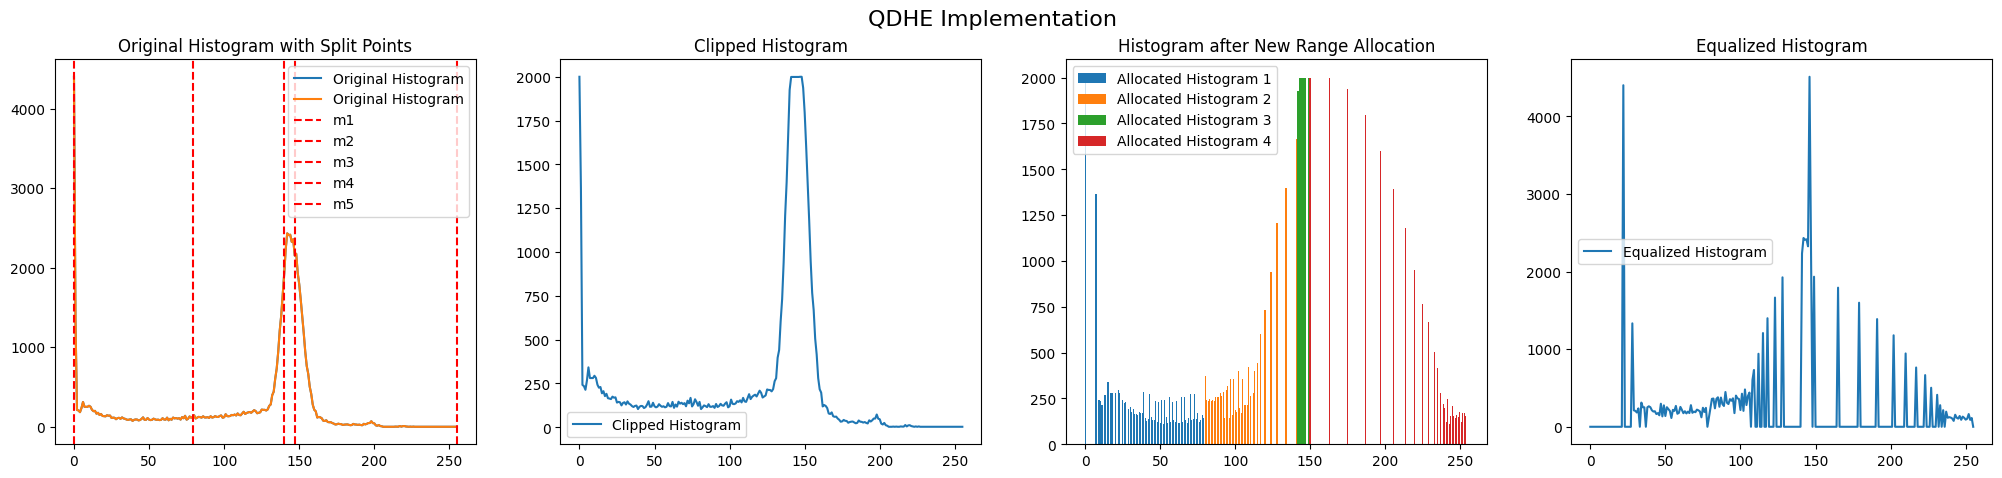

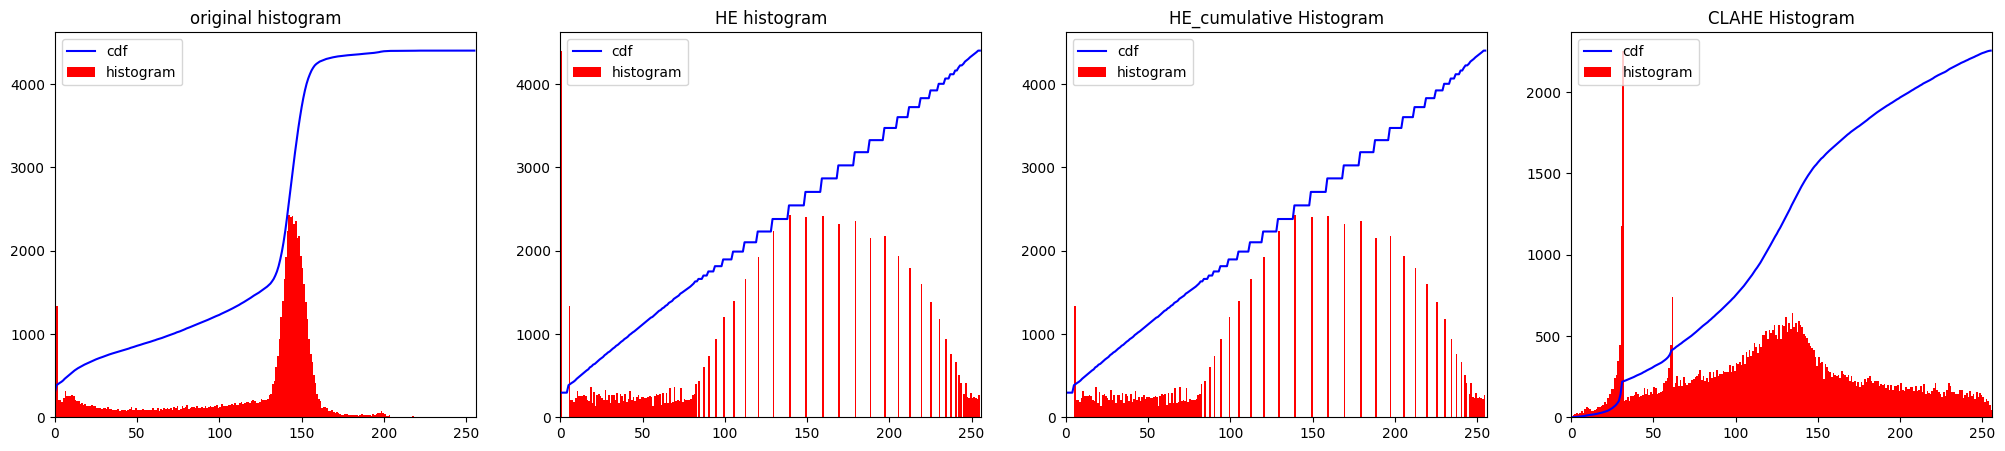

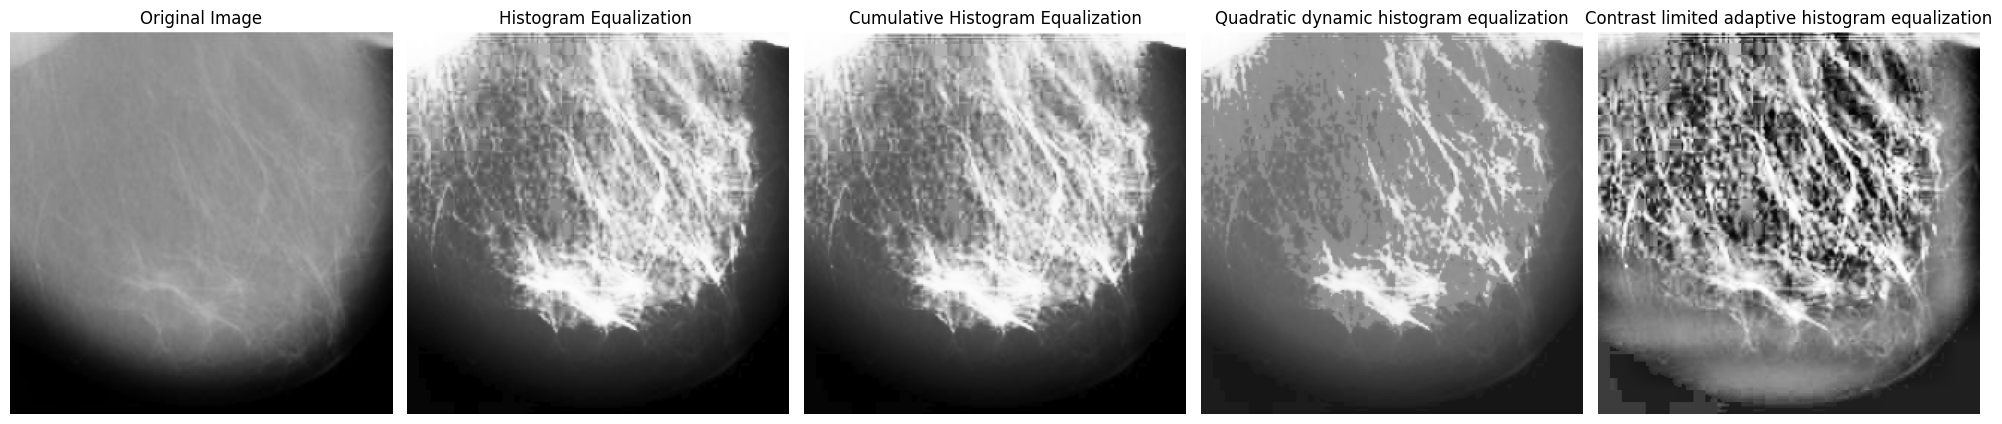

In [ ]:
malign_metrics=process_and_plot(images_path[7],2000,30,(8,8))

 **Images Observation :** ( for both Malingn and Belingn images )

- **Original Image:** The image is quite flat with low contrast, making it hard to see finer details.
- **Histogram Equalization:** The image looks significantly brighter with enhanced overall contrast, which may cause some areas to lose detail.
- **Cumulative Histogram Equalization:** Appears to offer a middle ground with better-preserved details compared to HE, enhancing contrast while maintaining a more natural appearance.
- **Quadratic Dynamic Histogram Equalization:** Provides a nuanced contrast enhancement that is neither too flat nor overly sharp, preserving detail throughout the image's different intensity ranges.
- **Contrast Limited Adaptive Histogram Equalization:** The image has the most detailed and balanced contrast enhancement, improving visibility especially in lower-contrast areas without introducing noise, which is particularly beneficial for medical or detailed imagery.


#Results

Table for MSE:
Method          HE_CHE    HE_CLAHE   HE_Manual   HE_OpenCV    HE_QDHE
Image                                                                
(Beningn,)   99.312561  105.877289   99.312561   94.127777  55.565094
(Malign,)   107.587357  107.314377  107.587357  105.980362  67.687439
(Normal,)    92.193588  109.282288   92.193588   91.018158  88.520248
(Retina,)    74.562717  109.800739   74.562717   80.857201  34.704674
Table for PSNR:
Method         HE_CHE   HE_CLAHE  HE_Manual  HE_OpenCV    HE_QDHE
Image                                                            
(Beningn,)  28.126633  27.848646  28.126633  28.359496  30.648654
(Malign,)   27.779062  27.790095  27.779062  27.844420  29.791594
(Normal,)   28.449667  27.711177  28.449667  28.505394  28.626248
(Retina,)   29.371457  27.690622  29.371457  29.019487  32.692795
Table for SD:
Method         HE_CHE   HE_CLAHE  HE_Manual  HE_OpenCV    HE_QDHE   Original
Image                                                         

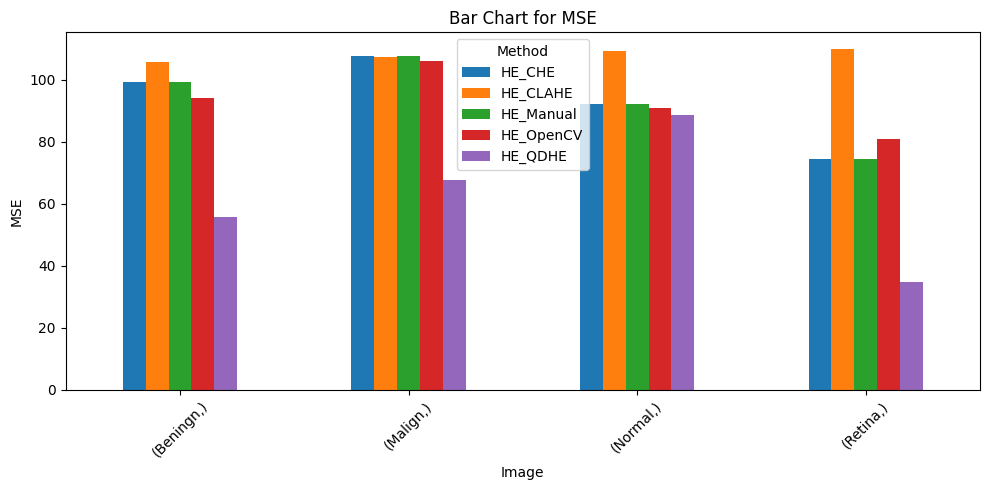

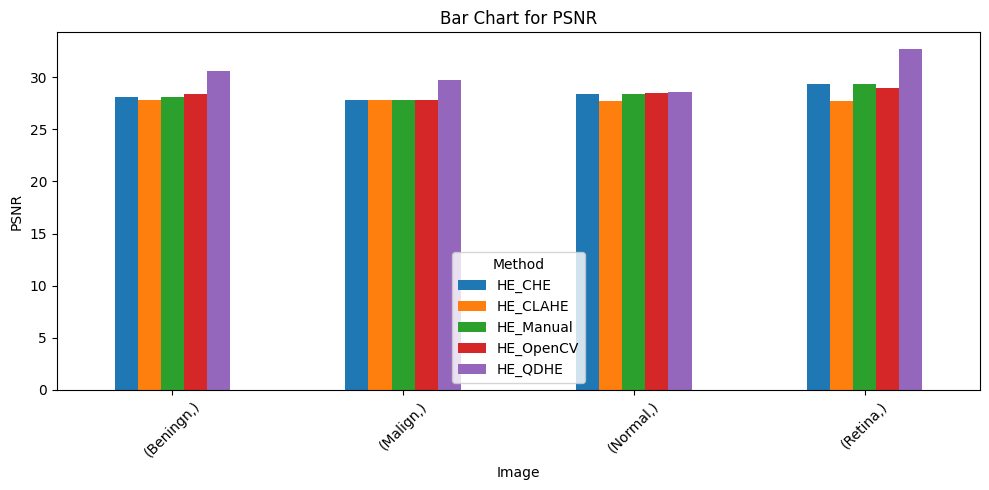

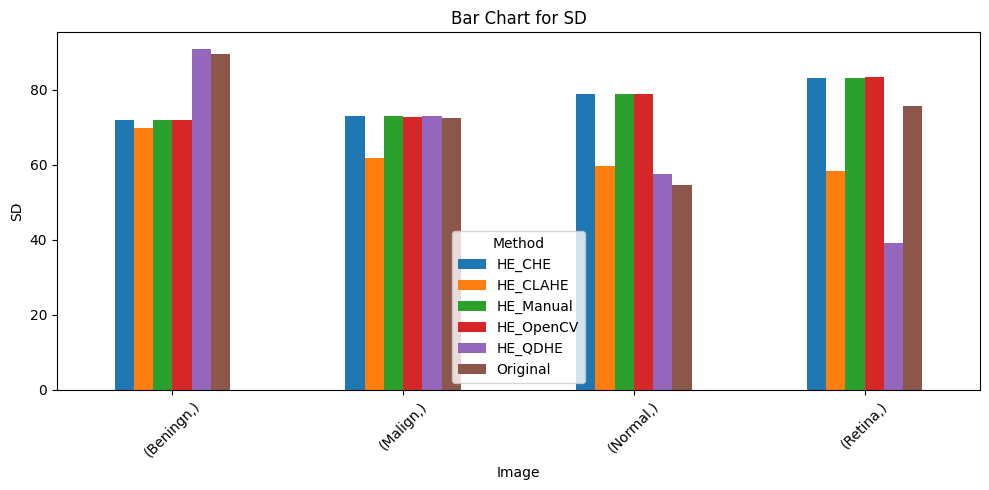

In [ ]:

all_metrics_df = pd.concat([retina_metrics, normal_metrics, beningn_metrics, malign_metrics], ignore_index=True)

# Create tables for each metric
for metric in ['MSE', 'PSNR', 'SD']:
    # Filter the DataFrame to exclude rows where metric value is None for MSE and PSNR
    metric_df = all_metrics_df if metric == 'SD' else all_metrics_df.dropna(subset=[metric])
    # Pivot the table to have images as rows, methods as columns, and metric values as cell values
    metric_table = metric_df.pivot_table(index='Image', columns='Method', values=metric, aggfunc='first')
    # Print the table
    print(f"Table for {metric}:")
    print(metric_table)

# Plot grouped bar charts for each metric
for metric in ['MSE', 'PSNR', 'SD']:
    # Filter the DataFrame to exclude the 'Original' method for MSE and PSNR, if necessary
    metric_df = all_metrics_df if metric == 'SD' else all_metrics_df[all_metrics_df['Method'] != 'Original']

    # Pivot the DataFrame for plotting
    metric_pivot = metric_df.pivot_table(index='Image', columns='Method', values=metric, aggfunc='first')

    # Plot
    ax = metric_pivot.plot(kind='bar', figsize=(10, 5), title=f'Bar Chart for {metric}')
    ax.set_ylabel(metric)
    ax.set_xlabel('Image')
    plt.xticks(rotation=45)
    plt.legend(title='Method')
    plt.tight_layout()  # Adjusts the plot to ensure everything fits without overlapping
    plt.show()




#Analysis and Comparison






**Mean Squared Error (MSE):**
MSE measures the average squared difference between the enhanced and original images. Lower values indicate better enhancement because they imply less deviation from the original image's structure.

**Peak Signal to Noise Ratio (PSNR):**
PSNR is used to measure the quality of the enhanced image. Higher PSNR values usually indicate better quality because they suggest a higher signal (image information) to noise ratio.


**Standard Deviation (SD):**
SD in the context of image processing can indicate the contrast of an image. A higher SD after enhancement suggests increased contrast, which can be desirable in medical images to highlight details.



Quantitative Analysis for Each Metric:


**Mean Squared Error (MSE):**
CLAHE seems to achieve lower MSE values, CLAHE typically adjusts the contrast locally within small regions, which can preserve the original image's structure more faithfully than global methods, resulting in a lower MSE.


**Peak Signal to Noise Ratio (PSNR):**
 CLAHE appears to have higher PSNR values across different image categories : High PSNR values with CLAHE could be due to its contrast limiting feature that prevents amplifying noise while enhancing the image, thus maintaining a high signal-to-noise ratio.


**Standard Deviation (SD):**
The method that increased SD the most, indicating higher contrast, seems to be HE or QDHE depending on the image type : HE typically stretches the histogram of the entire image, which can significantly increase the contrast. QDHE's segment-wise approach to equalization also allows it to enhance contrast effectively in different regions of the image.

- **CLAHE** consistently offers the best compromise, improving contrast with minimal quality loss, as shown by its low MSE and high PSNR,suggesting it preserves the original image quality better while enhancing contra,  making it preferable for **detail-sensitive applications like medical imaging**.
- **HE** generally increases contrast but can degrade image quality, which is less ideal when preserving original details is a priority.
- CHE and QDHE provide intermediate results, enhancing images with fewer quality trade-offs, suitable for images needing moderate contrast adjustments.

#Conclusion


In summary, our comparative analysis of image enhancement methods has revealed that:

**CLAHE** stands out as the superior technique, especially beneficial in fields that demand high-quality image processing, like medical imaging. It provides enhanced contrast while preserving the texture and detail necessary for accurate analysis.

**HE and CHE enhancements** can be related to the original images' characteristics. Specifically, images with a relatively uniform intensity distribution or lacking in extreme dark or bright areas led to HE and CHE producing similar results. This is because both methods stretch the histogram across the available intensity range, and without significant extremes in the original image, their applied adjustments converge, resulting in comparable visual outcomes.


**QDHE** serves as a **balanced approach**, particularly useful when dealing with images that require a nuanced enhancement without significant deviation from the original quality.

For medical applications where detail and texture are paramount, CLAHE is likely to be the best choice. It offers a more detailed and textured image, crucial for accurate diagnosis. The condition of the original photo is essential; images with reasonable contrast levels to begin with typically yield the best results after enhancement.

Compared to the conclusions drawn in the article, our results align with the emphasis on CLAHE's effectiveness for medical imaging. The article may also highlight conditions under which each method is preferred, which supports the notion that the choice of method should be tailored to the specific characteristics of the image and the requirements of the task.